In [77]:
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn import metrics

In [69]:
combined_data = pd.read_csv('./sources/raw_data/combined_data_20220302.csv')

In [55]:
combined_data.columns

Index(['avg_score', 'num_rodent_inspections', 'total_number_restaurants',
       'year', 'zipcode'],
      dtype='object')

In [71]:
ind_vars = combined_data[['num_rodent_inspections', 'zipcode']].copy()
dep_vars = combined_data[['avg_score']]

In [73]:
ind_vars = pd.get_dummies(ind_vars, columns = ['zipcode'])

KeyError: "None of [Index(['zipcode'], dtype='object')] are in the [columns]"

In [64]:
np.random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(ind_vars, dep_vars, train_size = 0.7, test_size = 0.3, random_state = 100)

In [74]:
model = LinearRegression()
model.fit(x_train, y_train)
Y_pred = model.predict(x_test)
print(model.coef_)
print(model.intercept_)

[[-2.62588291e-04  2.12481227e+00  5.44009282e-15  3.91355351e-01
   1.46658748e+00 -5.75444409e-02 -1.25104239e+00 -1.73146842e+00
  -3.55271368e-15  1.25089370e+00 -2.45728641e+00  1.77147302e-02
  -2.88657986e-15 -6.21724894e-15 -1.89165839e+00 -1.41627460e+00
  -3.33066907e-15  8.21565038e-15  4.67460306e-01 -1.87263165e+00
  -2.74373321e+00  4.88498131e-15 -1.73764728e-02  3.50538618e+00
  -1.49603266e+00  3.45482913e-02  1.58215253e+00 -8.88178420e-16
  -1.59496752e+00  3.55271368e-15  6.99440506e-15  8.36559637e+00
   1.74860126e-15  1.77635684e-15  8.60616872e-01 -7.21413203e-01
   7.99103439e+00 -2.82875998e+00  2.13007308e+01 -1.64210698e+00
  -2.77340568e+00  6.66133815e-16 -3.55271368e-15 -2.04193155e+00
  -2.35411314e+00 -1.31972945e+00 -3.10862447e-15 -2.88657986e-15
  -8.05356585e-01 -8.04375724e-01 -6.57945105e-01 -1.37719449e+00
   0.00000000e+00 -1.04365622e+00 -1.08778635e+00  3.10862447e-15
   1.51695603e+00  1.38688633e+00  3.35799050e-01 -2.11327297e+00
  -2.33146

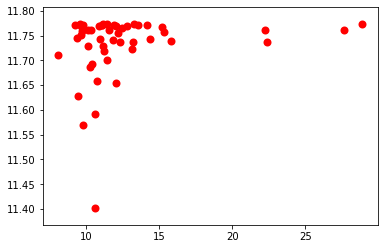

In [76]:
plt.scatter(y_test, Y_pred, color='red', linewidth=2)
plt.show()

In [78]:
print('R-squared:', metrics.r2_score(y_test, Y_pred))

R-squared: -0.03455153550257006


In [79]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))
print('R-squared:', metrics.r2_score(y_test, Y_pred))

Mean Absolute Error: 2.4161598584048356
Mean Squared Error: 18.51514638210622
Root Mean Squared Error: 4.302923004436196
R-squared: -0.03455153550257006


In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(ind_vars, dep_vars, test_size=0.4, random_state=0)

In [82]:
model3 = LinearRegression()
model3.fit(X_train, Y_train)
print(model3.intercept_)
print(model3.coef_)

[11.85642503]
[[-4.55740408e-04  2.06446116e+00 -8.95935448e-01  2.39808173e-14
   1.38634170e+00 -1.38949134e-01 -1.33186763e+00 -1.81094159e+00
  -2.22044605e-16  1.55431223e-15 -2.48596057e+00  0.00000000e+00
   1.39490996e+00 -8.83074326e-01 -1.95838352e+00 -1.49767929e+00
  -7.84198454e-01 -1.55431223e-15  3.98610501e-01  2.22044605e-15
   2.22044605e-15 -1.42420773e+00  2.34841241e-02 -1.02695630e-14
  -1.48221336e+00  4.44089210e-16  1.60350476e+00 -1.68753900e-14
   3.77475828e-15 -3.64750307e+00 -1.30292506e+00 -2.22044605e-16
  -1.66013885e+00 -2.40720507e+00 -4.44089210e-16 -7.65732690e-01
   7.94536284e+00 -2.90746054e+00 -6.66133815e-16 -1.68063191e+00
  -2.85596929e+00 -1.55431223e-15  1.92533482e-01 -2.12140472e+00
   2.22044605e-16 -1.44328993e-15  4.44089210e-16 -2.06376116e+00
  -8.80773562e-01 -8.85200960e-01 -7.35100451e-01 -1.39659735e+00
   4.44089210e-16 -1.01380530e+00 -1.14697855e+00 -1.55431223e-15
   3.33066907e-16  1.11022302e-16  4.16835288e-01 -2.15160474e

In [84]:
Y_pred = model3.predict(X_test)

In [85]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R-squared:', metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error: 2.553013704557713
Mean Squared Error: 16.68505815975874
Root Mean Squared Error: 4.084734772265971
R-squared: -0.00806864781162786


In [86]:
import random

In [87]:
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(ind_vars, dep_vars, test_size=0.2, random_state = random.randint(1,1000))
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    print('Trial {}, R-squared: {},  Slope: {}, Intercept: {},  '.format(i, metrics.r2_score(Y_test, Y_pred), \
                                                                      model.coef_, model.intercept_))

Trial 0, R-squared: -0.08523231285099508,  Slope: [[-2.67492005e-04  2.13351312e+00 -9.35879315e-01  4.01115398e-01
   1.47478324e+00 -4.93781007e-02 -1.24286134e+00 -1.72325305e+00
  -1.77198069e+00  1.25912869e+00 -2.44778135e+00  1.71196390e-13
   1.44927854e+00 -8.74261857e-01 -1.88311937e+00 -1.40810826e+00
  -6.95192166e-01 -5.29318936e-01  4.75945388e-01 -5.16808818e-14
  -2.73504217e+00 -1.39619393e+00 -6.10608161e-03  3.51561699e+00
  -1.48544879e+00  4.36855670e-02  1.59292765e+00 -2.76577902e-01
  -1.58532025e+00 -3.60160567e+00  1.09079412e-13  8.37477287e+00
  -1.60106406e+00 -2.33664712e+00  2.66453526e-15 -7.12305350e-01
   0.00000000e+00 -2.82052499e+00  2.13095052e+01 -1.63285202e+00
  -2.76526877e+00  1.44328993e-15  2.80410280e-01 -2.03371617e+00
  -2.34592718e+00 -1.31152388e+00 -8.44857212e-01 -1.97419013e+00
  -7.97038229e-01 -7.96194672e-01 -6.49670883e-01 -1.36745405e+00
  -2.16788067e+00 -1.03266534e+00 -1.07905608e+00 -4.70232503e-01
   1.52960437e+00  1.39905

In [91]:
rsquare = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(ind_vars, dep_vars, test_size=0.2, random_state = random.randint(1,1000))
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    rsquare.append(metrics.r2_score(Y_test, Y_pred))
    
rdf = pd.DataFrame( {'trial': range(10), 'Rsquare': rsquare})

In [92]:
rdf

,trial,Rsquare
0,0,-0.050523
1,1,-0.016981
2,2,-0.028229
3,3,0.001639
4,4,-0.460108
5,5,-0.086312
6,6,-0.015093
7,7,-0.198792
8,8,-0.006405
9,9,-0.547968


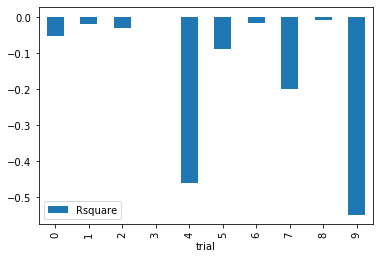

In [93]:
rdf.plot.bar(x='trial', y='Rsquare')